In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#Importing and checking data
df = pd.read_csv("../data/raw/titanic.csv")
print (df.head())
print (df.shape)

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
(418, 12)


In [51]:
# data types in each label 
print (df.dtypes)

numerical_cols = df.select_dtypes(include=['int64' , 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical : " , numerical_cols)
print("Categorical : ", categorical_cols)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Numerical :  Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical :  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: >

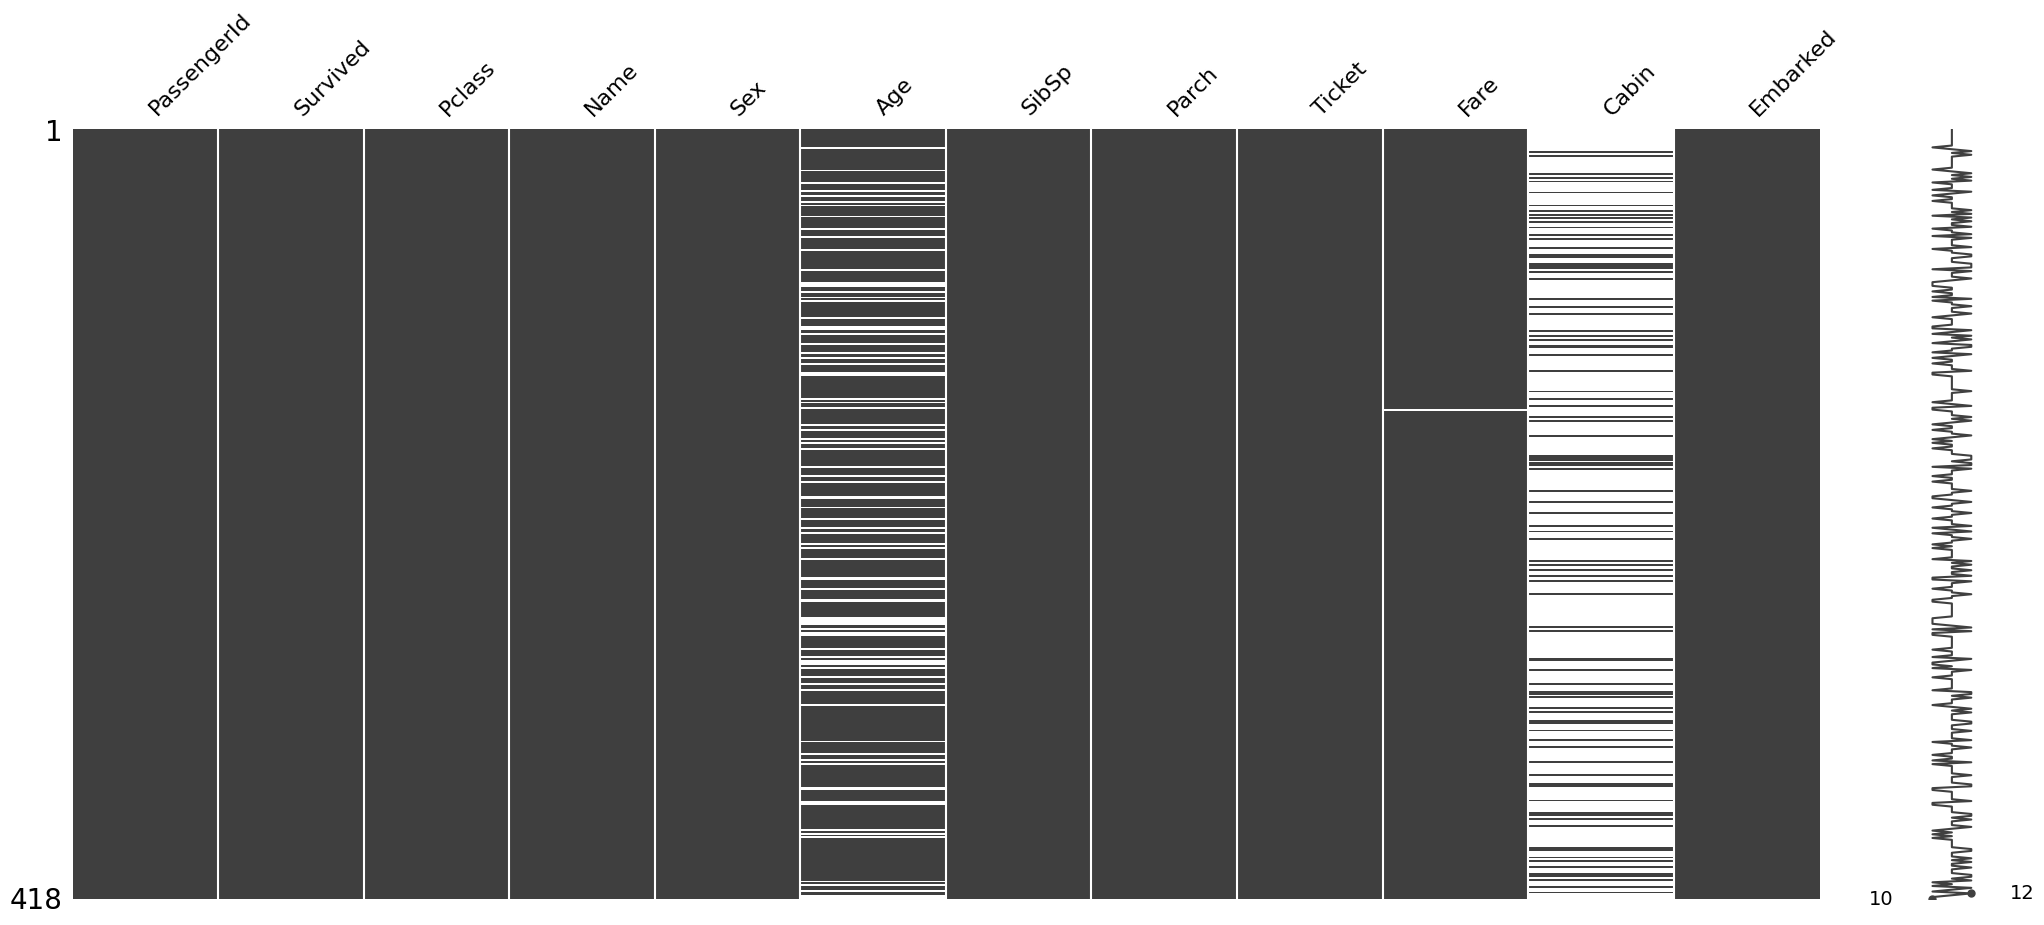

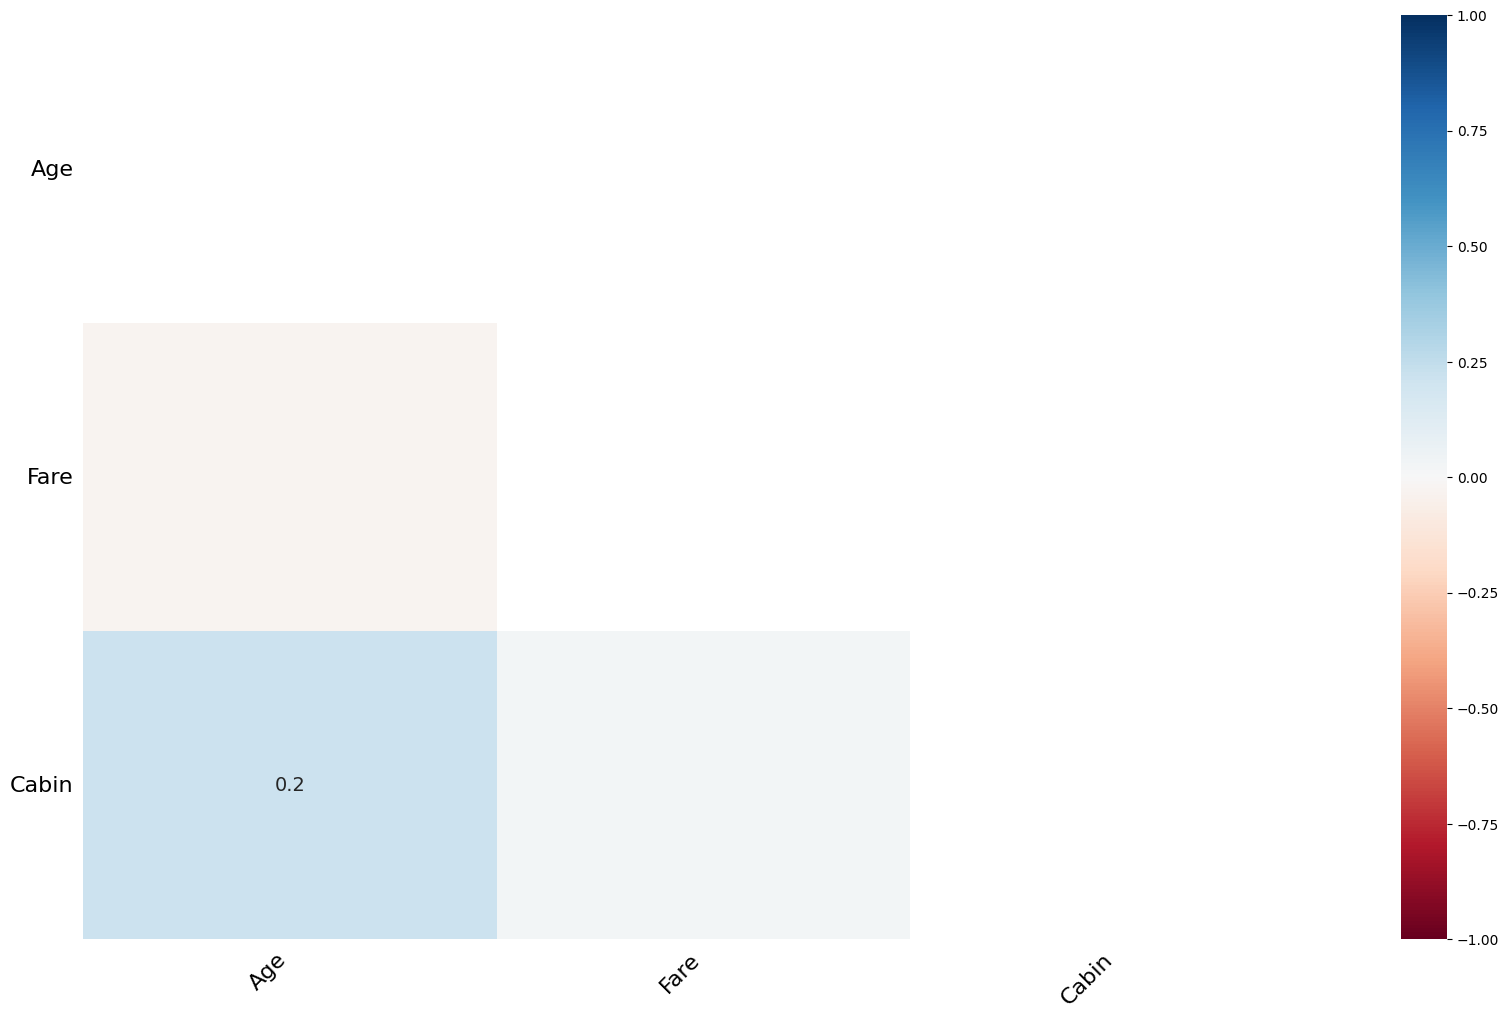

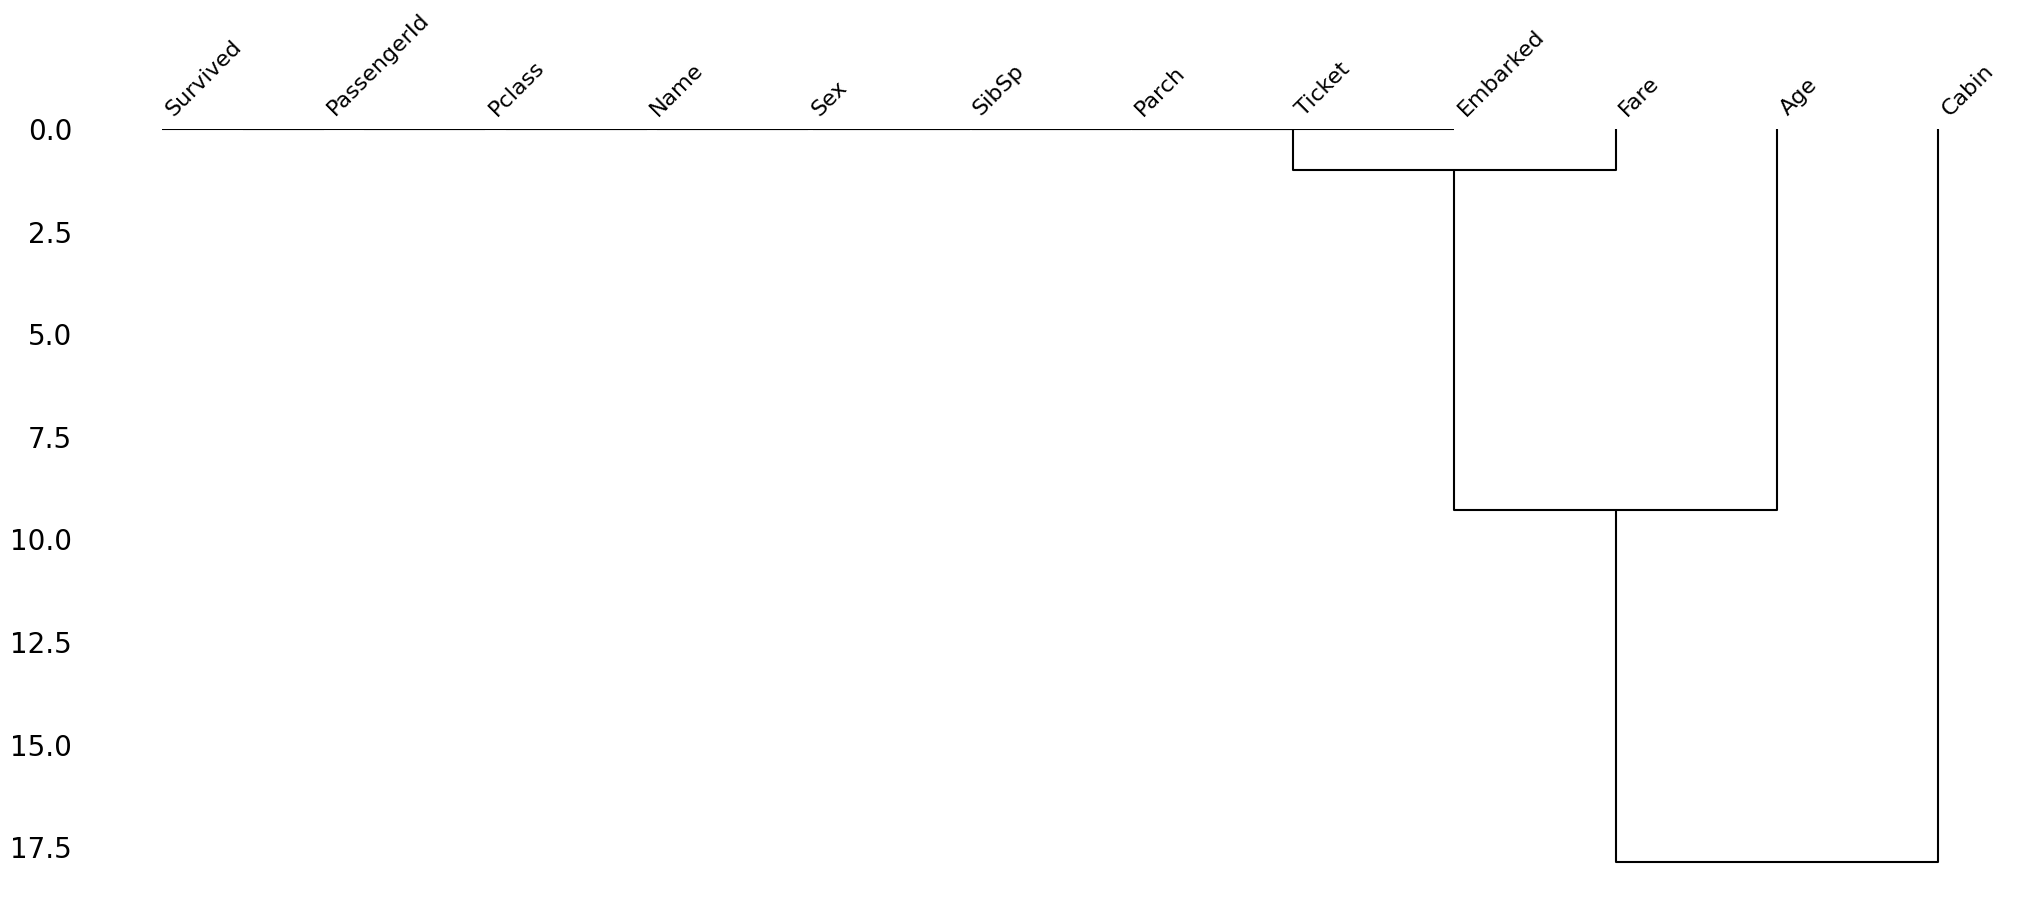

In [52]:
#Now the missing values and their matrix
missing = df.isna().sum()
print(missing)

import missingno as msno
msno.matrix(df)
msno.heatmap(df)
# msno.bar(df)
msno.dendrogram(df)

In [53]:
#Description of the data as a whole
summary  = df.describe()
print(summary)

for col in categorical_cols:
    print(df[col].value_counts())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  
Name
Peter, Master. Michael J                        1
Kelly, Mr. James          

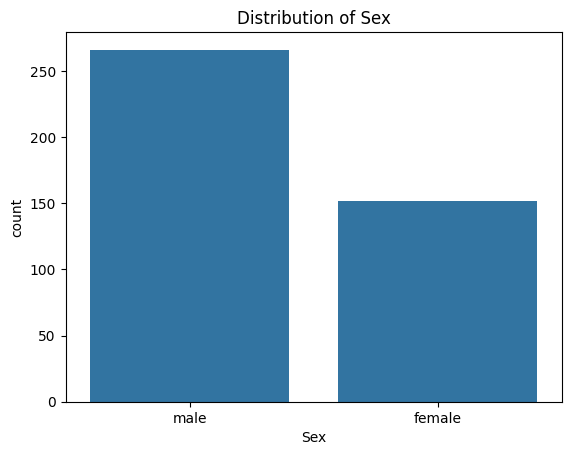

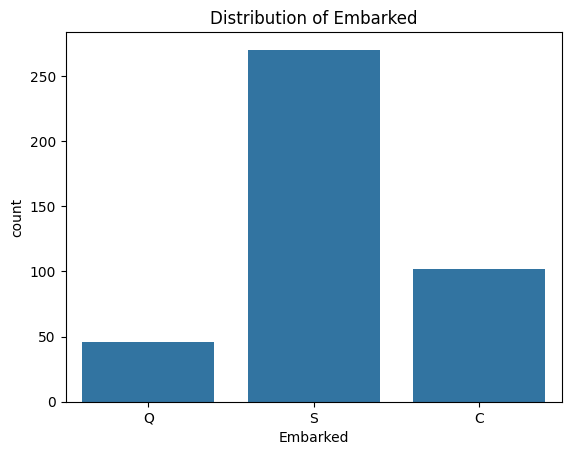

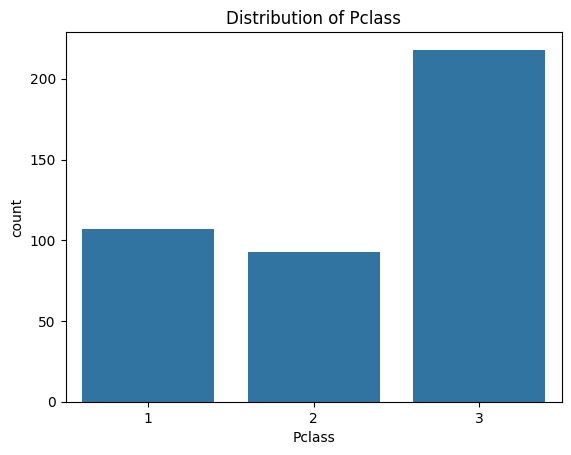

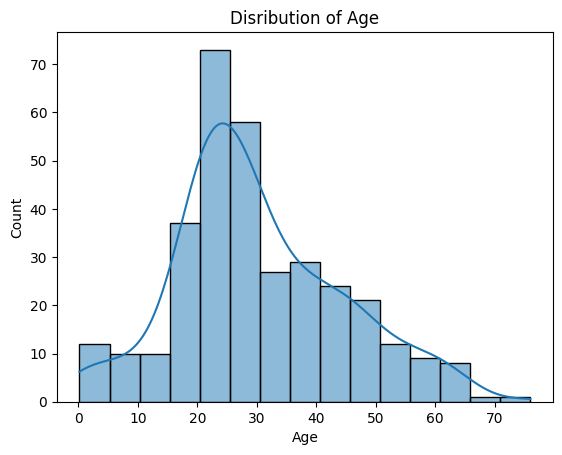

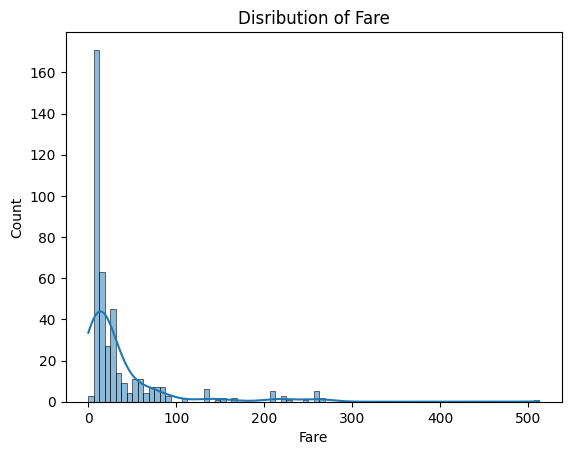

In [54]:
#univariate analysis
for col in ['Sex' , 'Embarked', 'Pclass']:
    sns.countplot(data=df , x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

for col in ['Age' , 'Fare']:
    sns.histplot(df[col], kde = True)
    plt.title(f'Disribution of {col}')
    plt.show()

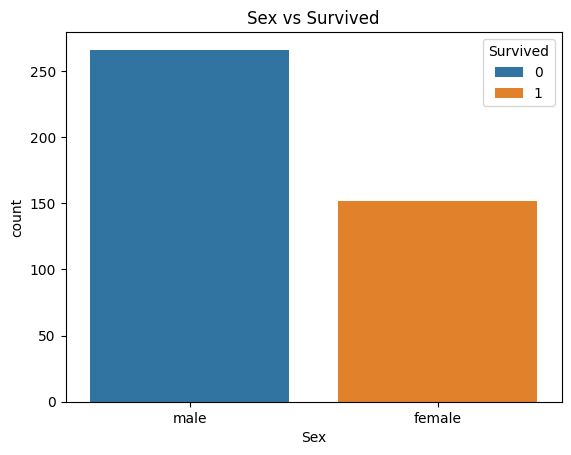

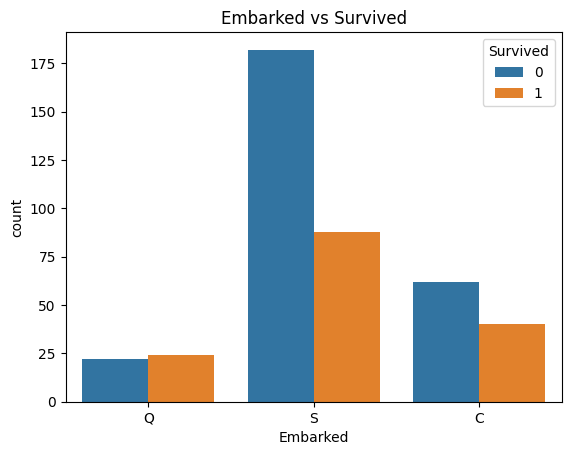

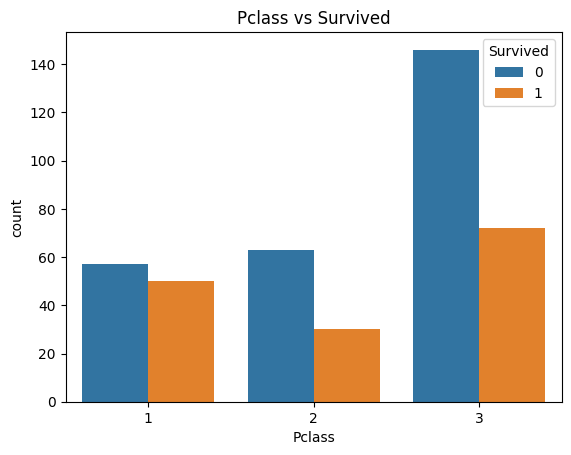

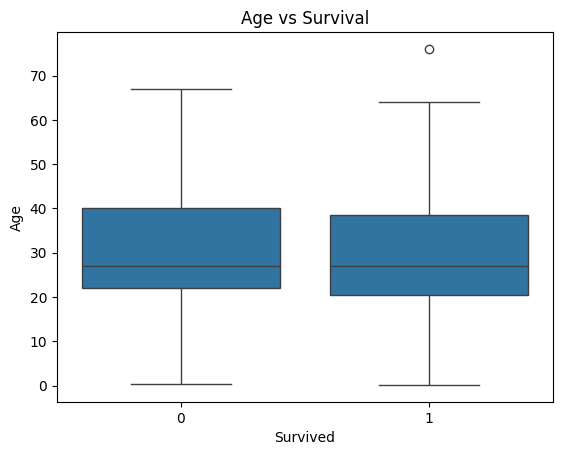

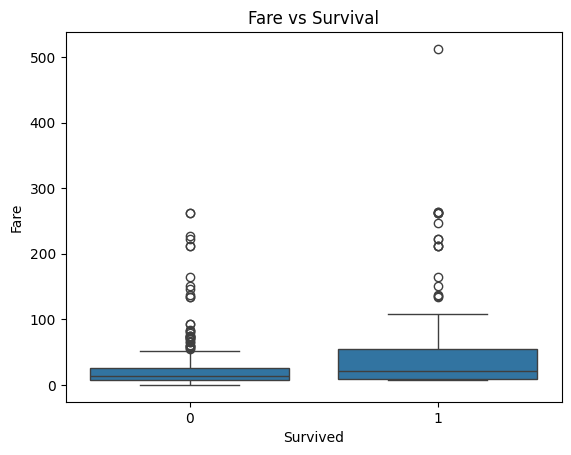

In [55]:
#bivariate analysis commpared to survival
for col in ['Sex' , 'Embarked' , 'Pclass']:
    sns.countplot(data=df, x=col, hue='Survived')
    plt.title(f'{col} vs Survived')
    plt.show()

for col in ['Age', 'Fare']:
    sns.boxplot(data=df, x='Survived' , y=col)
    plt.title(f"{col} vs Survival")
    plt.show()

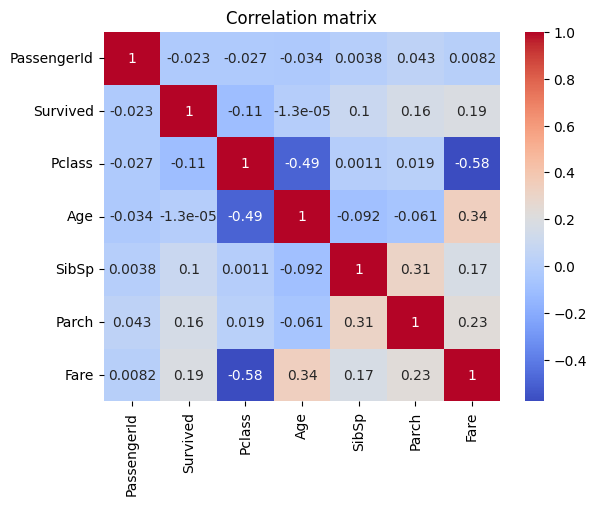

In [56]:
#correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

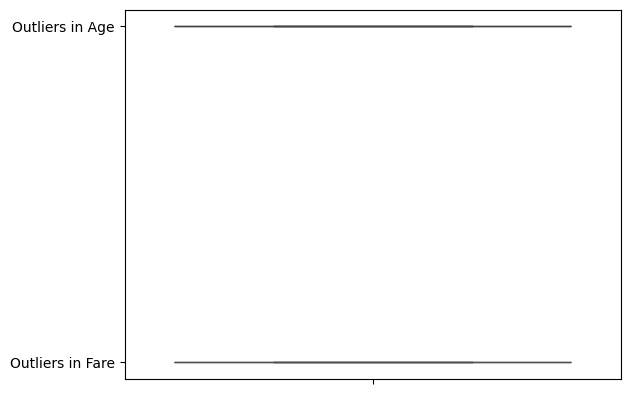

In [57]:
#outliers
for col in ['Age', 'Fare']:
    sns.boxplot(f"Outliers in {col}")
    plt.show

In [58]:
#Extracting titles
df['Title'] = df['Name'].apply(lambda x: x.split(',')[0].strip())
print(df['Title'].value_counts())

Title
Sage            4
Asplund         4
Thomas          4
Ware            4
Davies          4
               ..
Jones           1
Ilmakangas      1
Assaf Khalil    1
Chaffee         1
del Carlo       1
Name: count, Length: 352, dtype: int64


# Observation: Women had higher survival rates
# Observation: Cabin, Age have significant missing values